<a href="https://colab.research.google.com/github/sabill/dphi-boothcamp-ml/blob/main/Assignment_1_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn==0.23.1
!pip install imblearn==0.4.3

     |████████████████████████████████| 6.9MB 3.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
ERROR: Could not find a version that satisfies the requirement imblearn==0.4.3 (from versions: 0.0)
ERROR: No matching distribution found for imblearn==0.4.3


##Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

##Dataset

In [81]:
insurance_data = pd.read_csv("https://github.com/dphi-official/Datasets/blob/master/travel_insurance/Training_set_label.csv?raw=true")

In [27]:
insurance_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [28]:
insurance_data.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

23.74060735686045


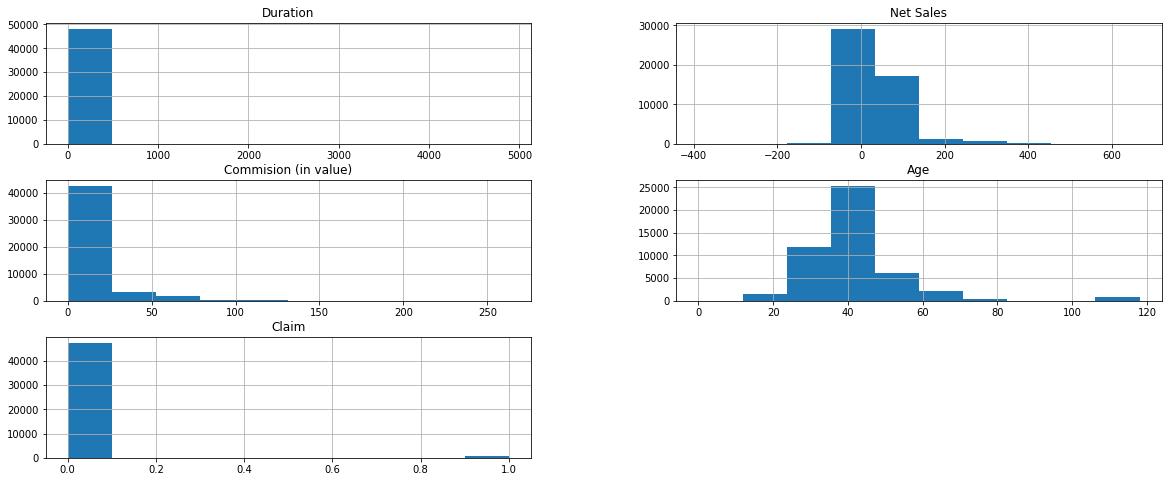

In [29]:
print(insurance_data.Duration.skew())

insurance_data.hist(figsize=(20,8))
plt.show()

In [30]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


In [31]:
sum(n<0 for n in insurance_data.Duration)

3

In [21]:
sum(n<0 for n in insurance_data['Net Sales'])

522

In [22]:
sum(n<0 for n in insurance_data['Commision (in value)'])

0

In [23]:
sum(n<0 for n in insurance_data.Age)

0

In [24]:
sum(n<0 for n in insurance_data.Claim)

0

In [38]:
sample1 = insurance_data[insurance_data.Claim == 1]
print(sample1.describe())
sample1.head()

         Duration   Net Sales  Commision (in value)         Age  Claim
count  708.000000  708.000000            708.000000  708.000000  708.0
mean   112.319209   95.595579             25.780749   38.731638    1.0
std    142.015956   93.880729             31.450015   14.713146    0.0
min      2.000000  -10.000000              0.000000   14.000000    1.0
25%     16.000000   29.500000              4.000000   30.000000    1.0
50%     38.500000   53.500000             13.000000   36.000000    1.0
75%    121.250000  127.000000             46.960000   44.000000    1.0
max    419.000000  507.000000            208.160000  118.000000    1.0


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
20,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,252.85,63.21,M,52,1
45,EPX,Travel Agency,Online,2 way Comprehensive Plan,43,VIET NAM,20.00,0.00,NaN,36,1
58,C2B,Airlines,Online,Bronze Plan,34,SINGAPORE,39.00,9.75,F,64,1
152,EPX,Travel Agency,Online,2 way Comprehensive Plan,201,NEPAL,37.00,0.00,NaN,36,1
323,C2B,Airlines,Online,Bronze Plan,11,SINGAPORE,33.50,8.38,F,25,1


In [39]:
sample2 = sample1[ sample1.Gender == 'M']
print(sample2.describe())
sample2.head()

         Duration   Net Sales  Commision (in value)         Age  Claim
count  228.000000  228.000000            228.000000  228.000000  228.0
mean   149.135965  122.351096             33.615965   38.824561    1.0
std    163.221840  110.685906             34.081251   14.280232    0.0
min      2.000000   13.500000              0.000000   14.000000    1.0
25%     13.000000   30.000000              8.380000   30.000000    1.0
50%     41.000000   67.800000             17.775000   35.500000    1.0
75%    365.000000  216.000000             54.000000   45.000000    1.0
max    416.000000  507.000000            208.160000  118.000000    1.0


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
20,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,252.85,63.21,M,52,1
657,C2B,Airlines,Online,Silver Plan,21,SINGAPORE,27.00,6.75,M,72,1
809,C2B,Airlines,Online,Annual Silver Plan,367,SINGAPORE,216.00,54.00,M,48,1
865,JWT,Airlines,Online,Value Plan,81,INDIA,124.00,49.60,M,118,1
874,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,252.85,63.21,M,51,1


In [40]:
sample3 = sample1[ sample1.Gender == 'F']
print(sample3.describe())
sample3.head()

         Duration   Net Sales  Commision (in value)         Age  Claim
count  255.000000  255.000000            255.000000  255.000000  255.0
mean   135.066667  109.032745             30.285020   39.101961    1.0
std    158.094010   99.971485             31.353927   16.219623    0.0
min      2.000000   13.500000              0.000000   16.000000    1.0
25%     16.000000   29.500000              8.380000   28.500000    1.0
50%     36.000000   60.000000             15.750000   35.000000    1.0
75%    365.000000  216.000000             54.000000   46.000000    1.0
max    419.000000  399.600000            208.000000  118.000000    1.0


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
58,C2B,Airlines,Online,Bronze Plan,34,SINGAPORE,39.0,9.75,F,64,1
323,C2B,Airlines,Online,Bronze Plan,11,SINGAPORE,33.5,8.38,F,25,1
450,C2B,Airlines,Online,Gold Plan,20,SINGAPORE,60.0,15.00,F,75,1
791,C2B,Airlines,Online,Silver Plan,29,SINGAPORE,27.0,6.75,F,33,1
872,C2B,Airlines,Online,Bronze Plan,18,SINGAPORE,34.5,8.63,F,30,1


In [82]:
insurance_data.fillna('Not Specified', inplace=True)
insurance_data.isna().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
Claim                   0
dtype: int64

In [83]:
#Drop 'Distribution Channel', 'Destination' and 'Agency Type'
data_3 = insurance_data.drop(columns = ['Distribution Channel', 'Destination', 'Agency Type'], axis=1)
data_3.head()

,Agency,Product Name,Duration,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Rental Vehicle Excess Insurance,61,19.8,11.88,Not Specified,29,0
1,EPX,Cancellation Plan,93,63.0,0.00,Not Specified,36,0
2,EPX,2 way Comprehensive Plan,22,22.0,0.00,Not Specified,25,0
3,C2B,Silver Plan,14,54.5,13.63,M,24,0
4,EPX,Cancellation Plan,90,10.0,0.00,Not Specified,23,0


In [84]:
data_3.isna().sum()

Agency                  0
Product Name            0
Duration                0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
Claim                   0
dtype: int64

In [85]:
#Perform one hot encoding for 'Agency','Gender','Product Name' using sklearn
# print('Unique value in column Agency:')
# print(data_3.Agency.unique(), '\n')

# print('Unique value in column Gender:')
# print(data_3.Gender.unique(), '\n')

# print('Unique value in column Product Name:')
# print(data_3['Product Name'].unique(), '\n')
ohe = OneHotEncoder(handle_unknown='ignore')
ohe_df = pd.DataFrame(ohe.fit_transform(data_3[['Agency','Gender','Product Name']]).toarray())
ohe_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
data_3 = data_3.join(ohe_df)
data_3.head()

,Agency,Product Name,Duration,Net Sales,Commision (in value),Gender,Age,Claim,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,CWT,Rental Vehicle Excess Insurance,61,19.8,11.88,Not Specified,29,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,EPX,Cancellation Plan,93,63.0,0.00,Not Specified,36,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,EPX,2 way Comprehensive Plan,22,22.0,0.00,Not Specified,25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C2B,Silver Plan,14,54.5,13.63,M,24,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,EPX,Cancellation Plan,90,10.0,0.00,Not Specified,23,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
ohe.categories_

[array(['ADM', 'ART', 'C2B', 'CBH', 'CCR', 'CSR', 'CWT', 'EPX', 'JWT',
        'JZI', 'KML', 'LWC', 'RAB', 'SSI', 'TST', 'TTW'], dtype=object),
 array(['F', 'M', 'Not Specified'], dtype=object),
 array(['1 way Comprehensive Plan', '2 way Comprehensive Plan',
        '24 Protect', 'Annual Gold Plan', 'Annual Silver Plan',
        'Annual Travel Protect Gold', 'Annual Travel Protect Platinum',
        'Annual Travel Protect Silver', 'Basic Plan', 'Bronze Plan',
        'Cancellation Plan', 'Child Comprehensive Plan',
        'Comprehensive Plan', 'Gold Plan', 'Individual Comprehensive Plan',
        'Premier Plan', 'Rental Vehicle Excess Insurance', 'Silver Plan',
        'Single Trip Travel Protect Gold',
        'Single Trip Travel Protect Platinum',
        'Single Trip Travel Protect Silver',
        'Spouse or Parents Comprehensive Plan', 'Ticket Protector',
        'Travel Cruise Protect', 'Travel Cruise Protect Family',
        'Value Plan'], dtype=object)]

In [87]:
# creating initial dataframe
#data_3.rename(columns={'Agency':'Agency_type','Gender':'Gender_type','Product Name':'Product_Name_type'}, inplace=True)
# # generate binary values using get_dummies
# dum_df = pd.get_dummies(bridge_df, columns=["Bridge_Types"], prefix=["Type_is"] )
# # merge with main df bridge_df on key values
# bridge_df = bridge_df.join(dum_df)
# bridge_df

In [119]:
x = data_3.drop(columns=['Agency','Gender','Product Name', 'Claim'], axis='columns')
x.head()

,Duration,Net Sales,Commision (in value),Age,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,61,19.8,11.88,29,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,93,63.0,0.00,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22,22.0,0.00,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14,54.5,13.63,24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,90,10.0,0.00,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
y = data_3.Claim
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claim, dtype: int64

In [121]:
#Split the data into training and test set with test_size = 0.3 and random_state = 101
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [64]:
!pip install imbalanced-learn

In [70]:
!pip install smote_variants

     |████████████████████████████████| 143kB 9.2MB/s 
  Created wheel for minisom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8606 sha256=969f482d129f386cda899aca67c369b3fb60a7bd57eb2421bff36619e1651448
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
  Created wheel for statistics: filename=statistics-1.0.3.5-cp36-none-any.whl size=7454 sha256=707ac81306b12dfb6f489cb30642586c59120d3f5f405cca40f5f1fa626591dc
  Stored in directory: /root/.cache/pip/wheels/75/55/90/73aa7662bfb4565b567618547a275f01372a678ca92ecd64f3
Successfully built minisom statistics


In [122]:
# use smote to equalize the classes on training set splitted in
import smote_variants as sv

oversampler= sv.MulticlassOversampling(sv.distance_SMOTE(random_state = 25, proportion=1.0))
x_samp, y_samp= oversampler.sample(x_train, y_train)

2020-12-11 11:44:33,544:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-12-11 11:44:33,557:INFO:MulticlassOversampling: Sampling minority class with label: 1
2020-12-11 11:44:33,570:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 25}")


In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [129]:
score = model.score(x_test, y_test)
print(score)

0.9865312888520514


In [133]:
from sklearn.metrics import f1_score
f1_score(y_test, model.predict(x_test))

0.0

In [134]:
#Build a Decision Tree model with random_state = 1
from sklearn import tree

In [135]:
model2 = tree.DecisionTreeClassifier()
model2 = model2.fit(x_train, y_train)

In [136]:
model2.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0])

[Text(180.55547838847605, 214.14545454545456, 'X[6] <= 0.5\ngini = 0.03\nsamples = 33782\nvalue = [33269, 513]'),
 Text(125.00162568287527, 207.55636363636364, 'X[2] <= 94.32\ngini = 0.014\nsamples = 29387\nvalue = [29177, 210]'),
 Text(88.51501712613296, 200.96727272727273, 'X[1] <= 27.5\ngini = 0.013\nsamples = 29155\nvalue = [28958, 197]'),
 Text(31.197443232745744, 194.37818181818182, 'X[15] <= 0.5\ngini = 0.007\nsamples = 15581\nvalue = [15527, 54]'),
 Text(19.88218852703914, 187.7890909090909, 'X[0] <= 26.5\ngini = 0.006\nsamples = 15470\nvalue = [15420, 50]'),
 Text(8.842641171198089, 181.2, 'X[3] <= 100.5\ngini = 0.003\nsamples = 9456\nvalue = [9444, 12]'),
 Text(4.881458022109352, 174.6109090909091, 'X[3] <= 20.5\ngini = 0.002\nsamples = 9424\nvalue = [9413, 11]'),
 Text(1.2803824320286825, 168.0218181818182, 'X[1] <= 22.5\ngini = 0.04\nsamples = 49\nvalue = [48, 1]'),
 Text(0.9602868240215119, 161.43272727272728, 'gini = 0.0\nsamples = 44\nvalue = [44, 0]'),
 Text(1.600478040

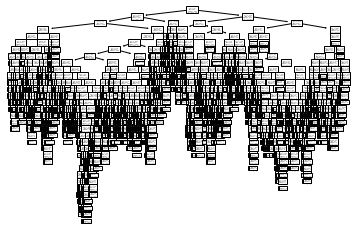

In [137]:
tree.plot_tree(model2) 

In [138]:
model2.score(x_test, y_test)

SyntaxError: ignored